Task 7 : Support Vector Machine (SVM)

In [1]:
# lOAD AND PREPARE DATASET 

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Create 2D binary classification dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [2]:
# Train SVM with linear and RBF kernels  

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Linear Kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

# RBF Kernel (non-linear)
svm_rbf = SVC(kernel='rbf', C=1, gamma=0.5)
svm_rbf.fit(X_train, y_train)

# Predict & Evaluate
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))


Linear SVM Accuracy: 0.9
RBF SVM Accuracy: 0.9222222222222223


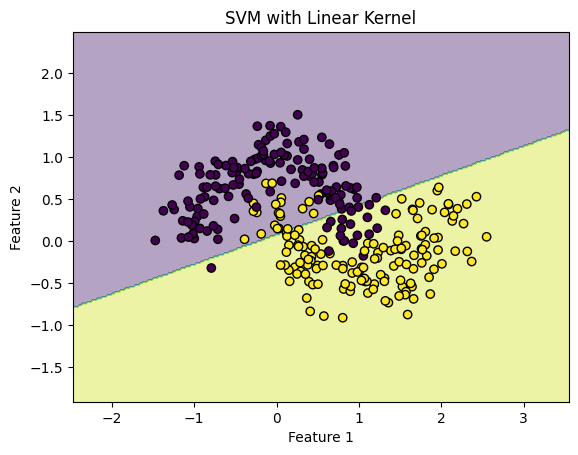

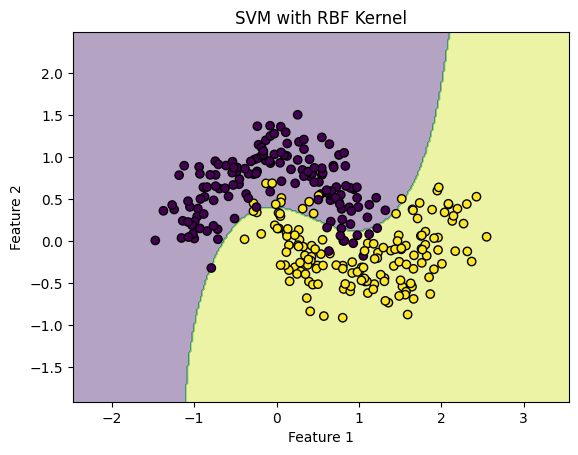

In [4]:
# visualize decision boundaries


def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(svm_linear, X, y, "SVM with Linear Kernel")
plot_decision_boundary(svm_rbf, X, y, "SVM with RBF Kernel")


In [5]:
# Tune Hyperparameters  

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.5, 1, 5],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

# Evaluate on test set
y_pred = grid.predict(X_test)
print("Test Accuracy with best params:", accuracy_score(y_test, y_pred))


Best Parameters: {'C': 1, 'gamma': 5, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9428571428571428
Test Accuracy with best params: 0.9888888888888889
